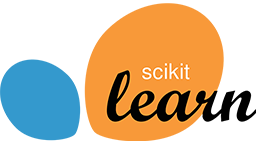

# Title : Decision Tree Classification | Pohon Keputusan
#### Source : https://youtu.be/5wwXKtLkyqs

Referensi: https://en.wikipedia.org/wiki/Decision_tree_learning

### Konsep Dasar

#### Terminology: root node, internal node, leaf node

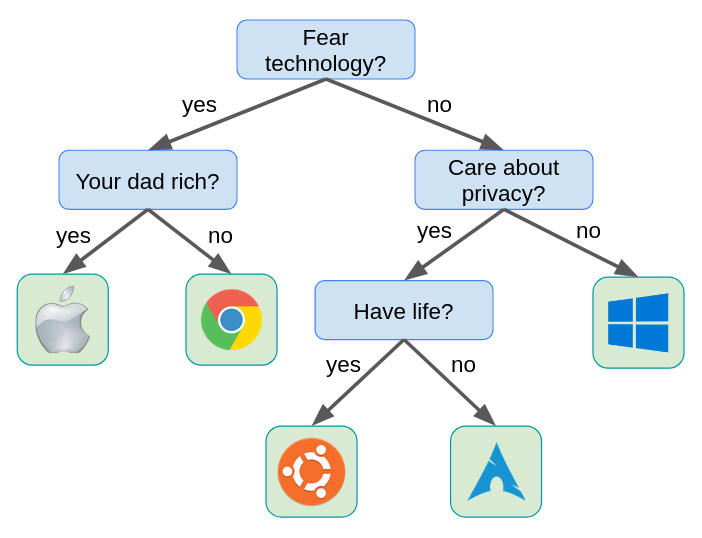

- Node decision binary tree memiliki 2 buah cabang pilihan.
- Root Node
    - Node yang paling awal.
- Internal Node
    - Node yang ada diantara root node dan leaf node.
- Leaf Node
    - Node yang plaing akhir/ prediksi class dari decision binary tree.
- Algorithm decision tree yang digunakan oleh SKLearn adalah CART (Classification and Regression Tree).

#### Gini Impurity

<div>
    <img src="./images/gini_example.png" width="500">
</div>

- Digunakan untuk melakukan *Impurity Measure* dengan jangkaun nilai 0-1.
- Dimana 0 berarti murni dan 1 berarti tidak murni.

##### Ruas Kiri:

$
\begin{align*} 
G &= 1 - \sum_i^n P_i^2 \\
  &= 1 - P(biru)^2 \\
  &= 1 - (\frac{4}{4})^2 = 0
\end{align*}
$

- Ruas kiri hanya memiliki class warna biru, sehingga otomatis murni/ G=0. Atau,
- Melalui perhitungan 1 dikurangi kuadrat dari nilai probability class biru.

##### Ruas Kanan:

$
\begin{align*}
G &= 1 - \sum_i^n P_i^2 \\
  &= 1 - (P(biru)^2 + P(hijau)^2)\\
  &= 1 - ( (\frac{1}{6})^2 + (\frac{5}{6})^2 ) = 0.278
\end{align*}
$

- Ruas kanan memiliki class warna biru dan hijau, sehingga perlu dihitung.
- Melalui perhitungan 1 dikurangi kuadrat dari nilai probability class biru (1/6) ditambah class hijau (5/6).

##### Average Gini Impurity:

$
\begin{align*}
G &= \frac{Anggota Ruas Kiri}{Ruas Kiri + Ruas Kanan} \times G Ruas Kiri + \frac{Anggota Ruas Kanan}{Ruas Kiri + Ruas Kanan} \times  G Ruas Kanan \\
\end{align*}
$

$
\begin{align*}
G &= \frac{4}{4+6} \times 0 + \frac{6}{4+6} \times  0.278 \\
  &= 0.1668
\end{align*}
$

#### Information Gain

<div>
    <img src="./images/information_gain.png" width="500">
</div>

#### Membangun Decision Tree

<div>
    <img src="./images/build_decision_tree.png" width="500">
</div>

1. Melakukan prediksi label berdasarkan color dan diameternya:
2. Menghitung nilai gini impurity sebelum dilakukan splitting.
3. Mendata pertanyaan untuk splitting.
4. Split berdasarkan kemungkinan pertanyaan.
5. Hitung nilai gini impurity setelah splitting dan nilai information gain.

- Decision tree dengan nilai information gain tertinggi akan dipilih sebagai hasil.

$
\begin{align*} 
G &= 1 - (P(apple)^2 + P(grape)^2 + P(lemon)^2) \\
   &=1 - ( (\frac{2}{5})^2 + (\frac{2}{5})^2 + (\frac{1}{5})^2 ) \\
   &= 0.63
\end{align*}    
$

### Dataset

Referensi: https://en.wikipedia.org/wiki/Iris_flower_data_set

- Menggunakan dataset bunga iris
- Kemudian, dataset akan displit untuk nilai features dan nilai label.

In [1]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)

print(f'Dimensi Feature: {X.shape}')
print(f'Class: {set(y)}')

Dimensi Feature: (150, 4)
Class: {0, 1, 2}


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

### Classification dengan `DecisionTreeClassifier`

In [3]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4) # kedalaman maksimum layer

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

### Visualisasi Model

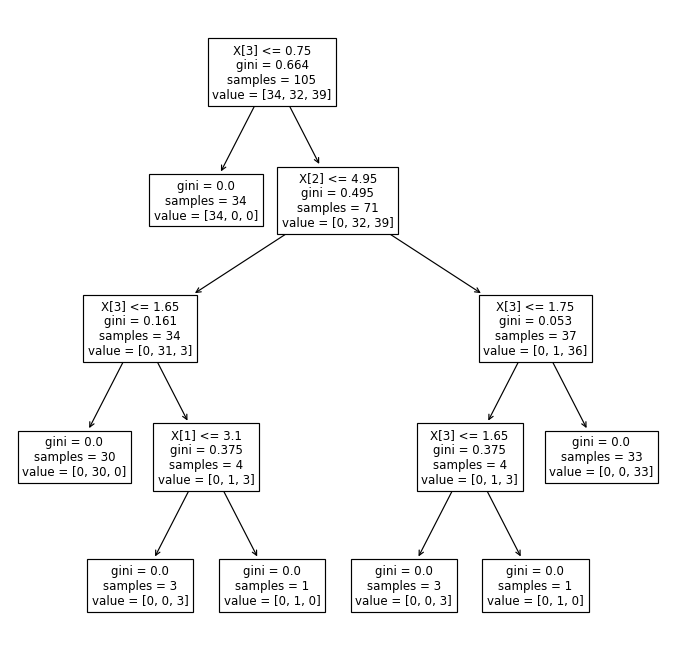

In [4]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.rcParams['figure.dpi'] = 85
plt.subplots(figsize=(10, 10))
tree.plot_tree(model, fontsize=10)
plt.show()

### Evaluasi Model

In [5]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

